In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy.interpolate import griddata

In [52]:
plt.style.use('ggplot')

# Read NFM dataset

In [62]:
# NFM dataset, 2m depth
nfm = xr.open_dataset('NFM7_Iddefjord/NFM7_20yrs.nc').sel(depth=-2, method='nearest')

In [56]:
nfm

<xarray.Dataset>
Dimensions:  (time: 1049)
Coordinates:
    depth    float32 -2.062
  * time     (time) datetime64[ns] 2000-01-01 ... 2019-12-26T23:53:36
Data variables: (12/28)
    TEMP     (time) float32 ...
    SAL      (time) float32 ...
    DENS     (time) float32 ...
    DOC      (time) float32 ...
    OXYG     (time) float32 ...
    TOTP     (time) float32 ...
    ...       ...
    PFYT2    (time) float32 ...
    C1       (time) float32 ...
    CFYT     (time) float32 ...
    CHL      (time) float32 ...
    CZOO     (time) float32 ...
    BACT     (time) float32 ...

# Read observations

In [19]:
df0 = pd.read_excel('NFM7_Iddefjord/Obs/AqM_all_YO_mai2021_v1.xlsx')

In [20]:
df0['StationCode'].unique()

array(['Ø-1', 'R-5', 'S-9', 'I-1', 'KF-1', 'LA-1', 'TØ-1', 'SF-1', 'D-2',
       'MO-2', 'D-3', 'BC-1', 'ID-2', 'BO-1', 'SP-1', 'SKJ-1', 'ST-1'],
      dtype=object)

### get Iddefjord station and 2 m depth

In [23]:
df = df0[df0['StationCode'] == 'ID-2'].reset_index(drop=True)

In [61]:
# get 2m depth
df = df[df['Depth1'] == 2].reset_index(drop=True)

### filter outliers

In [33]:
df['TOTP'][df['TOTP'] > 200] = np.nan

C:\Users\ABE\AppData\Local\Temp\ipykernel_17572\2088777011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTP'][df['TOTP'] > 200] = np.nan


# Mapping observations with NFM variables

In [63]:
# dictionary with pairs {OBS_name: NFM_name}
mapping = {'DOC': 'DOC', 'KlfA': 'CHL',
           'NH4-N': 'NH4', 'NO2-N': '-',
           'NO3+NO2-N': '-', 'NO3-N': 'NO3',
           'O2': 'OXYG', 'SiO2': 'SIO2',
           'PO4-P': 'PO4', 'P-PO4': '-', 
           'Salinitet': 'SAL', 'Temperatur': 'TEMP',
           'TOC': '-', 'TOTN': 'TOTN', 'TOTP': 'TOTP'}

# Plot OBS vs NFM

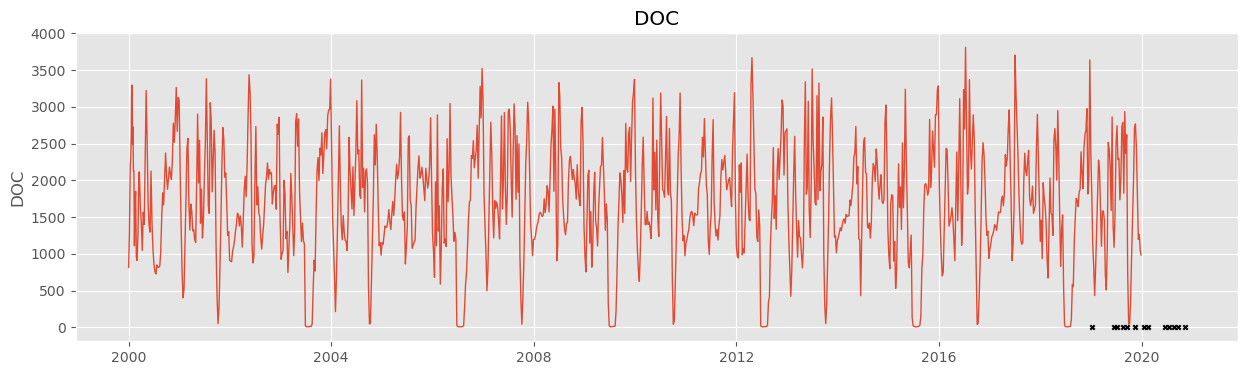

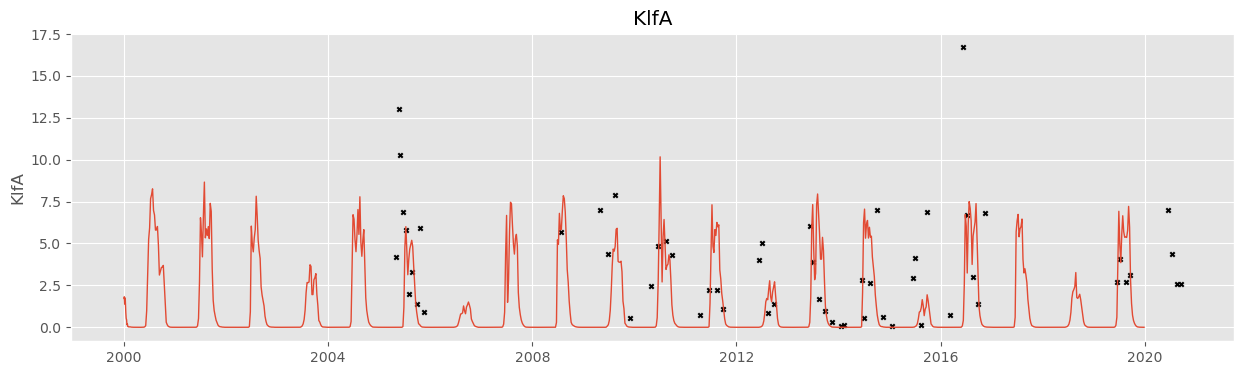

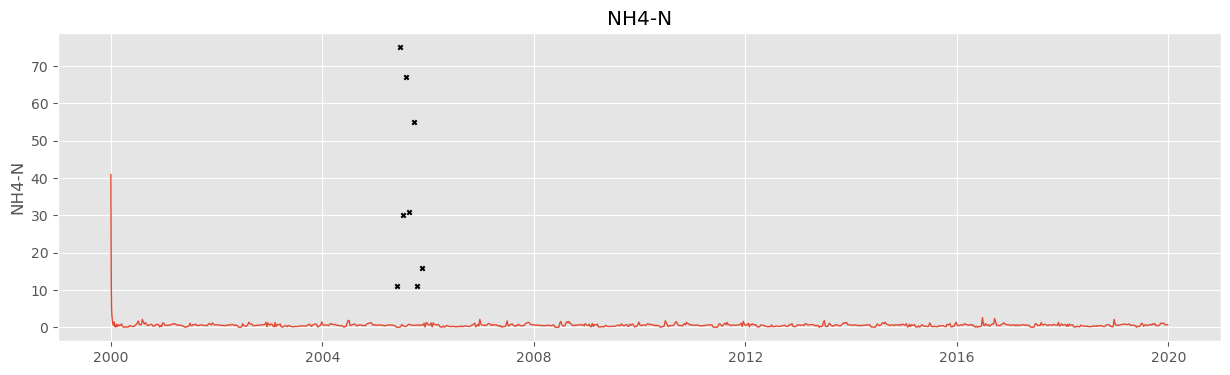

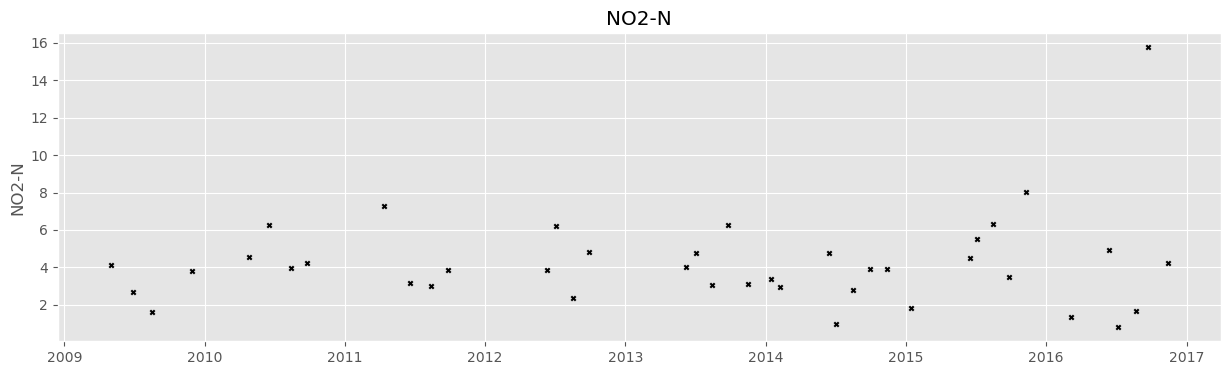

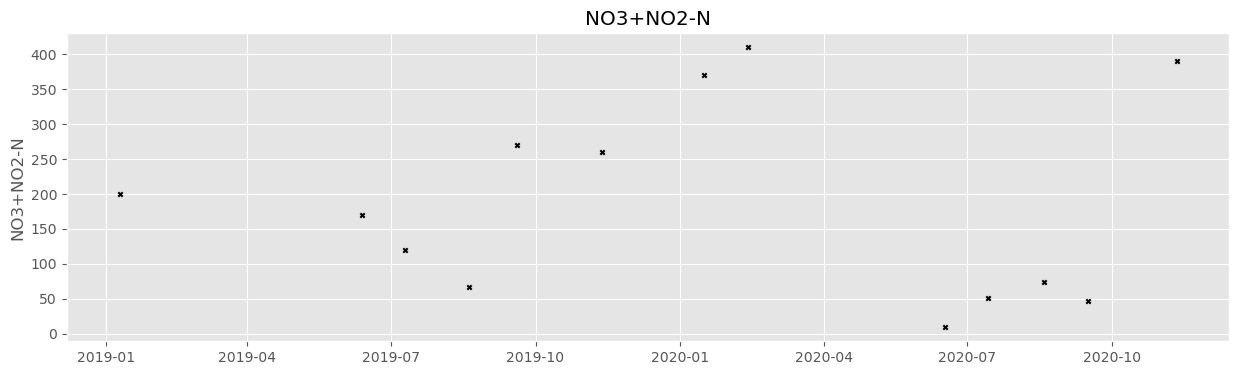

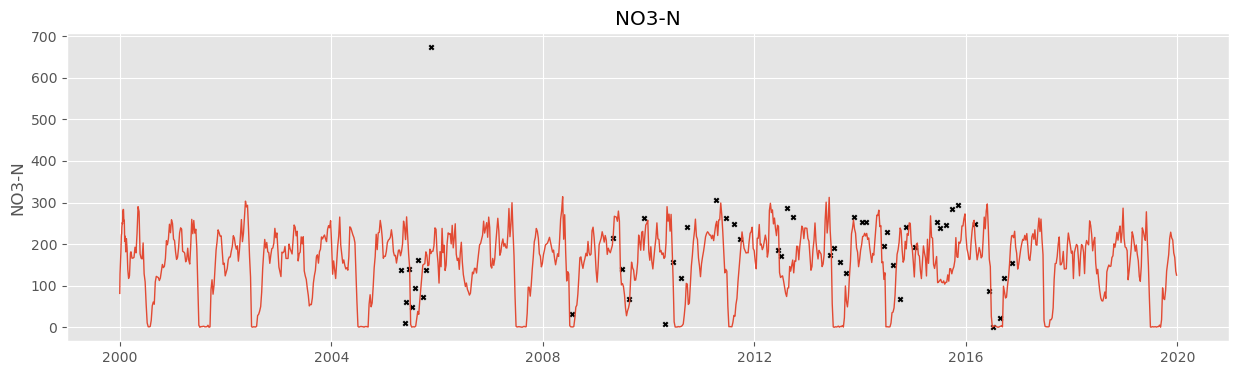

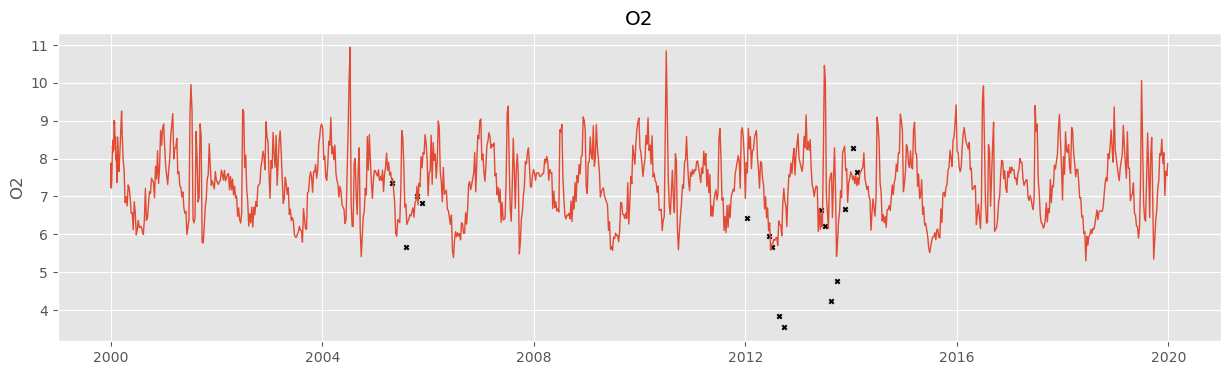

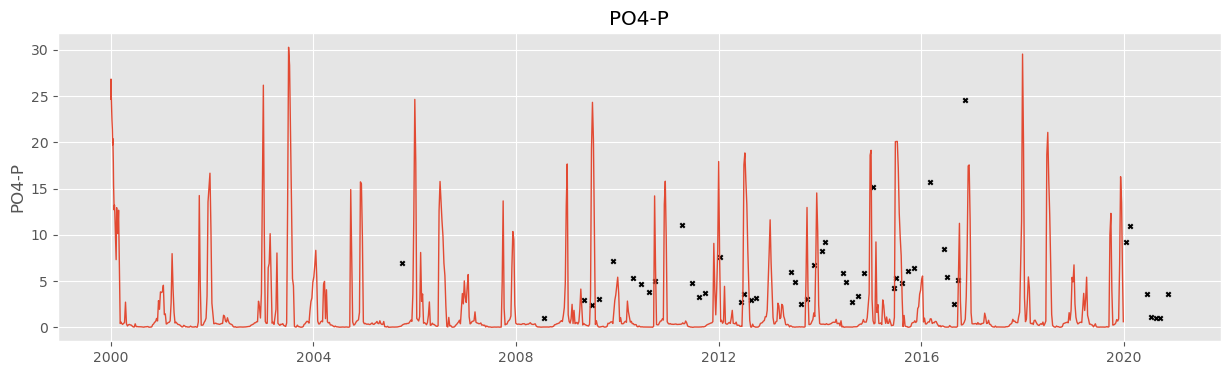

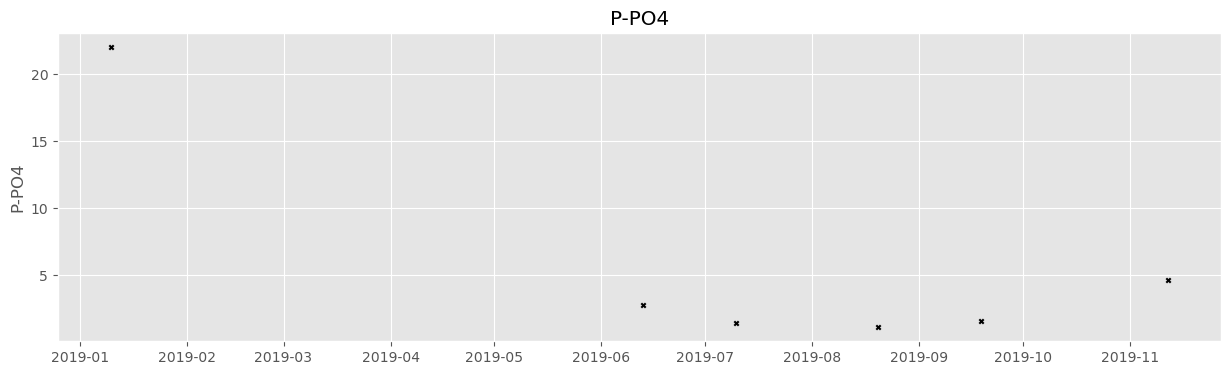

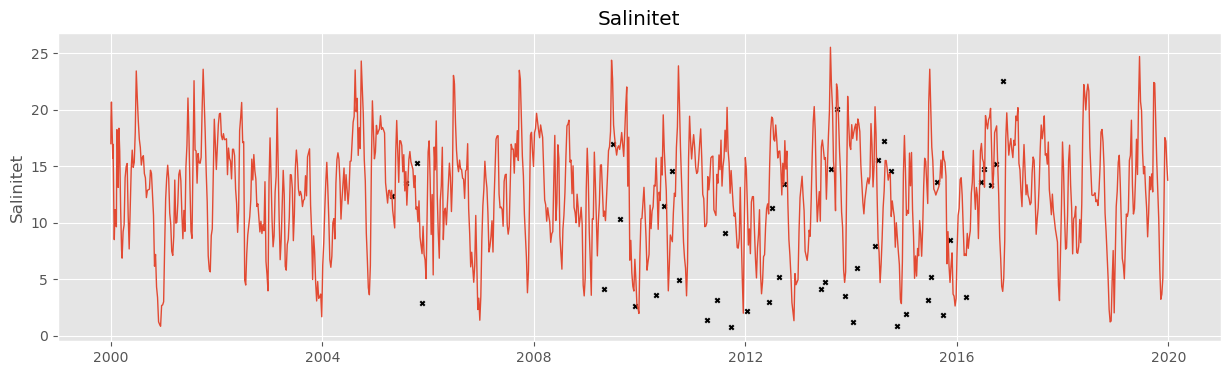

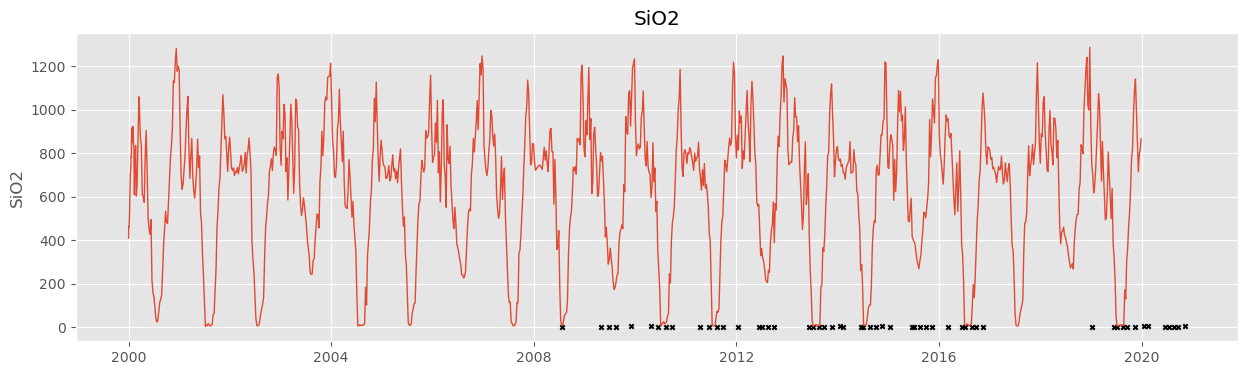

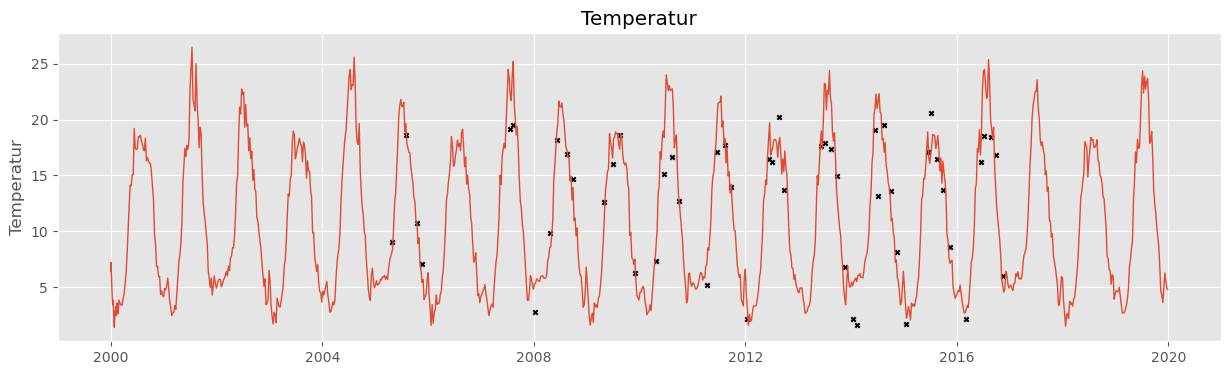

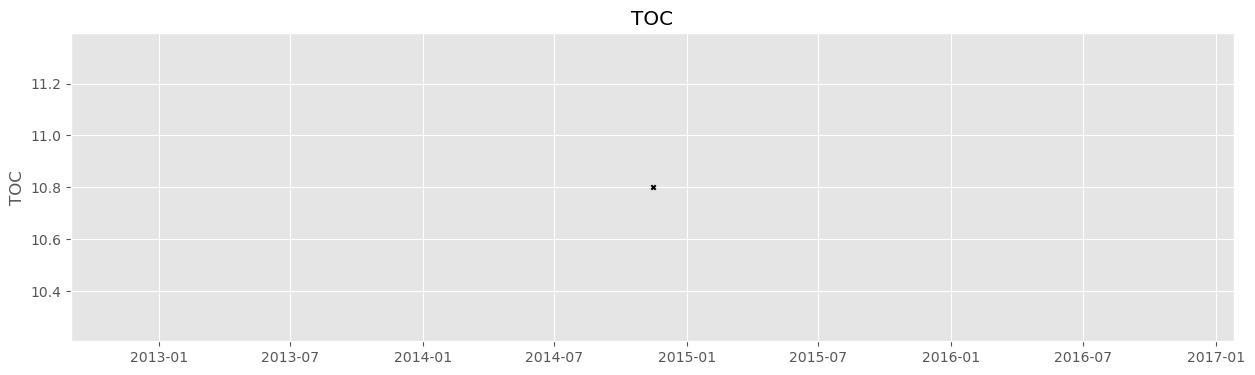

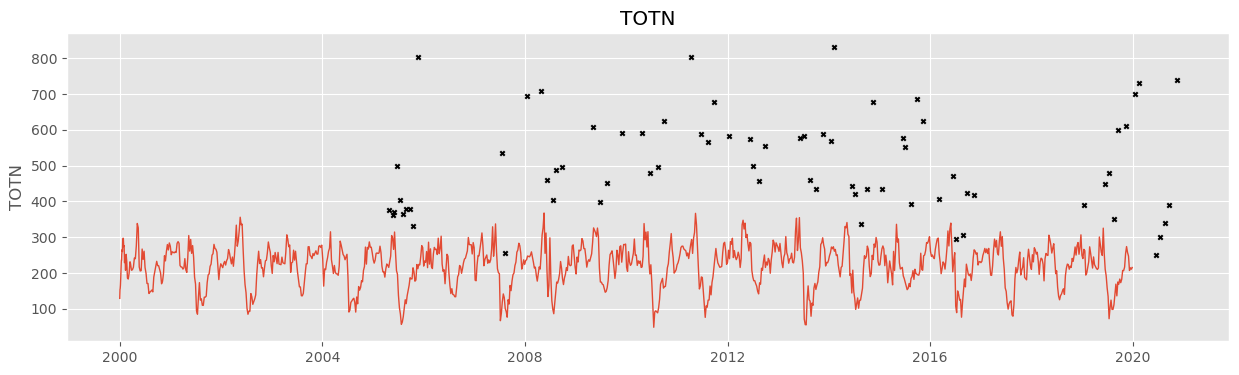

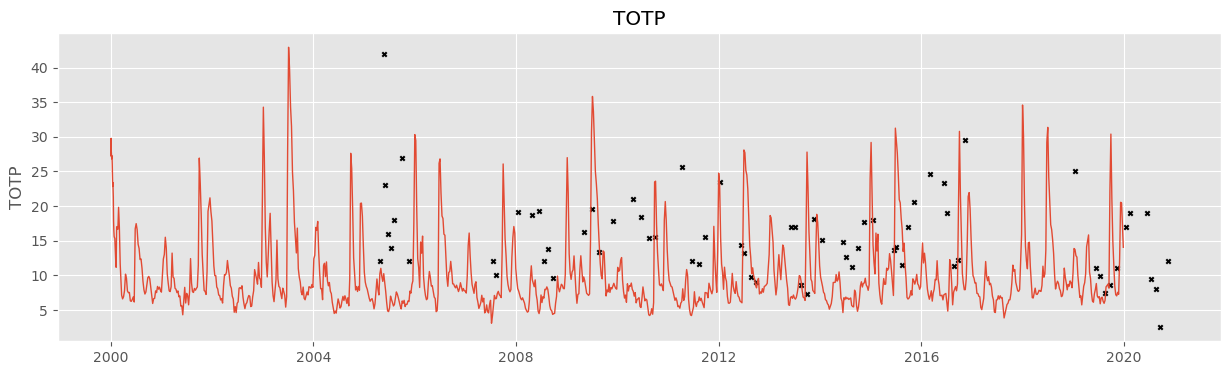

In [60]:
for obs_name, nfm_name in mapping.items():
    fig, ax = plt.subplots(figsize=(15,4))
    # observations
    sc = ax.scatter(df['SampleDate'], df[obs_name], c='k', s=10, marker = 'x') #, vmax=vmaxdict[name])
    
    # model
    if nfm_name != '-':
        line = ax.plot(nfm['time'], nfm[nfm_name], lw=1, label='IDD-R20')
    
    ax.set_title(obs_name)
    ax.set_ylabel(obs_name)
    plt.show()